# Lab 1 Inteligencia Artificial 
### Alejandro Tejada
### Carné: 17584
### Curso: Inteligencia Artificial
### Fecha: 8/03/2020

## Primero leemos el CSV

In [1]:
import csv 

### Lectura del CSV

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
dataSetFull = pd.read_csv("Admission_Predict.csv")

### Imprimimos la data

In [4]:
dataSetFull

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
a = np.array(dataSetFull)
a

array([[  1.  , 337.  , 118.  , ...,   9.65,   1.  ,   0.92],
       [  2.  , 324.  , 107.  , ...,   8.87,   1.  ,   0.76],
       [  3.  , 316.  , 104.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [398.  , 330.  , 116.  , ...,   9.45,   1.  ,   0.91],
       [399.  , 312.  , 103.  , ...,   8.78,   0.  ,   0.67],
       [400.  , 333.  , 117.  , ...,   9.66,   1.  ,   0.95]])

En este caso asignamos para intentar ver un array para poder ver la data en np.array, pero en realidad solo lo necesitamos en formato de np.array lo que necesitemos, acontinuacion haremos unas plots.


Graficamos la data para ver cuales tienen correlacion, y cuales  son las necesarias.

## Análisis de los Datos y Seleccionando los que necesitaremos

Primero decidamos que datos vamos a usar de todo el data set

Los que usaremos serán:
* GRE Score
* TOEFL Score
* SOP
* LOR
* CGPA
* Chance of Admit

### Asignamos valores de variables con los datos

In [16]:
fullData = pd.read_csv("Admission_Predict.csv")
greScore = np.array(fullData.iloc[0:300, 1].values)
toeflScore = np.array(fullData.iloc[0:300, 2].values)
SOPVar = np.array(fullData.iloc[:, 4].values)
LORVar = np.array(fullData.iloc[:, 5].values)
CGPAVar = np.array(fullData.iloc[:, 6].values)
axisY = np.array(fullData.iloc[0:300, 8].values)
axisYFull = np.array(fullData.iloc[:, 8].values)

# Graficando Datos

## GREScore Vs ChanceOfAdmit

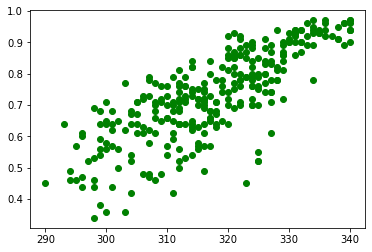

In [7]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
ax.scatter(greScore, axisY , color="green")

# Show the plot
plt.show()

## Toefl Vs ChanceOfAdmit

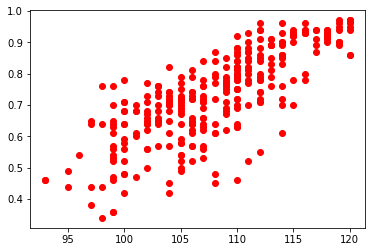

In [8]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
ax.scatter(toeflScore, axisY , color="red")

# Show the plot
plt.show()

## SOP Vs ChanceOfAdmit

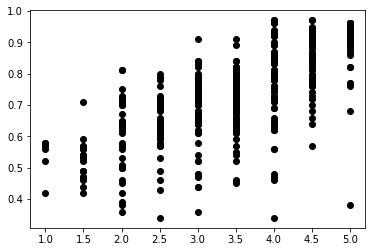

In [9]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
ax.scatter(SOPVar, axisYFull , color="black")

# Show the plot
plt.show()

## LOR Vs ChanceOfAdmit

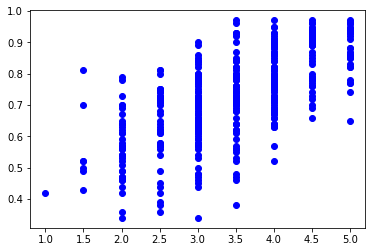

In [10]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
ax.scatter(LORVar, axisYFull , color="blue")

# Show the plot
plt.show()

## CGPA Vs ChanceOfAdmit

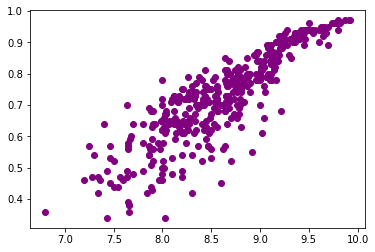

In [11]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
ax.scatter(CGPAVar, axisYFull , color="purple")

# Show the plot
plt.show()

## Variable a escoger

Dado que tanto como GRE, Toefl y CGPA muestran una tendencia adecuada para ser linea, se usará solo una variable para poder realizar los datos y poder hacer la regresión.
Se usará **GRESCORE** para poder hacer la regresión. 


# Usando nuestro modelo

Useremos nuestro propio Modelo, empezando por los métodos necesarios.


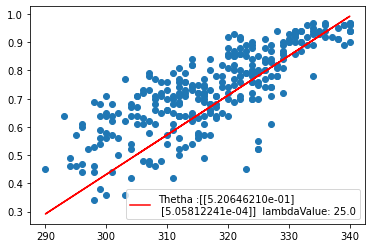

In [17]:
import numpy as np
import csv
import pandas as pd
import plotly.express as px

#definimos un costo de derivación regularizado, para regularizar, se usa lambdaValue
def linear_cost_derivate_regularized(X, y, theta, lambdaValue):
    vlambda = np.empty(300)
    vlambda.fill(lambdaValue)
    m, _ = X.shape
    h = np.matmul(X, theta)
    teta_0_regularized = h
    #es en la multiplicacion de la transpuesta que se le suma el valor de lambda value pr el teta_0 regularizado
    return (np.matmul((h - y).T, X).T + np.matmul(vlambda, teta_0_regularized)) / m


#un linea cost regularizaed, recibe como parámetro un lambda value
def linear_cost_regularized(X, y, theta, lambdaValue):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    teta_0_regularized = h ** 2
    #retornamos el lambdavalue sumado con el regularizado
    return (sq.sum() + (lambdaValue * teta_0_regularized.sum())) / (2 * m)

# ahora viene el dataset

TRAINING_ELEMENTS = 300
x = greScore
"""

x = np.linspace(
    -10,
    30,
    TRAINING_ELEMENTS
)

"""

X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        greScore,
        #x ** 3,
    )
).T

# y = x ** 3 + 50 - 100 * np.random.rand(TRAINING_ELEMENTS)
#y = 5 + 2 * x ** 3 + np.random.randint(-15, 15, TRAINING_ELEMENTS)
dataset_1 = (X, axisY.reshape(TRAINING_ELEMENTS, 1))

#Declaramos un gradiente para usarlo
#parámetros:. X como eje, y como eje, theta_o como el valor de theta inicial, cost, para valores, cost derivate para valores 
# del método de costo, alpha para aprendiza, threshold para acercamiento al gradiente, max_iter para iteraciones, 
# lambdavalue como valor de correción
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.00001,
        treshold=0.001,
        max_iter=10000,
        lambdaValue=0.5):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta, lambdaValue)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta, lambdaValue)
        i += 1
        costs.append(cost(X, y, theta, lambdaValue))
        gradient_norms.append(cost_derivate(X, y, theta, lambdaValue))
    return theta, costs, gradient_norms

#ahora la test


# Training data
(X, y) = dataset_1
m, n = X.shape
theta_burned = [[-3.77130144], [0.01401026]]
theta_0 = np.random.rand(n, 1)
theta_0_burned = [[0.6503114], [0.14125331]]


lambdaValue = 25.0

theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost_regularized,
    linear_cost_derivate_regularized,
    alpha=0.000001,
    treshold=0.000001,
    max_iter=10000,
    lambdaValue=lambdaValue,
)

# Plot training data
plt.scatter(X[:, 1], y)

plt.plot(X[:, 1], np.matmul(X, theta_burned), color='red',
         label="Thetha :" + str(theta) + "  lambdaValue: "+str(lambdaValue))

# plt.plot(np.arange(len(costs)), costs)
plt.legend()

plt.show()


# Usando el resto de los datos de test

In [15]:
greScore2 = np.array(fullData.iloc[300:400, 1].values)
axisY2 = np.array(fullData.iloc[300:400, 8].values)

Volvemos a usar la programacion

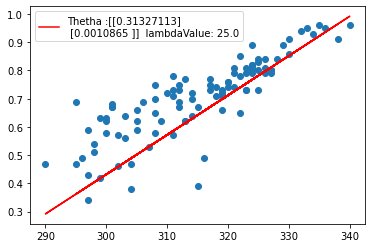

In [19]:
import numpy as np
import csv
import pandas as pd
import plotly.express as px

#definimos un costo de derivación regularizado, para regularizar, se usa lambdaValue
def linear_cost_derivate_regularized(X, y, theta, lambdaValue):
    vlambda = np.empty(100)
    vlambda.fill(lambdaValue)
    m, _ = X.shape
    h = np.matmul(X, theta)
    teta_0_regularized = h
    #es en la multiplicacion de la transpuesta que se le suma el valor de lambda value pr el teta_0 regularizado
    return (np.matmul((h - y).T, X).T + np.matmul(vlambda, teta_0_regularized)) / m


#un linea cost regularizaed, recibe como parámetro un lambda value
def linear_cost_regularized(X, y, theta, lambdaValue):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    teta_0_regularized = h ** 2
    #retornamos el lambdavalue sumado con el regularizado
    return (sq.sum() + (lambdaValue * teta_0_regularized.sum())) / (2 * m)

# ahora viene el dataset

TRAINING_ELEMENTS = 100
x = greScore2
"""

x = np.linspace(
    -10,
    30,
    TRAINING_ELEMENTS
)

"""

X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        greScore2,
        #x ** 3,
    )
).T

# y = x ** 3 + 50 - 100 * np.random.rand(TRAINING_ELEMENTS)
#y = 5 + 2 * x ** 3 + np.random.randint(-15, 15, TRAINING_ELEMENTS)
dataset_1 = (X, axisY2.reshape(TRAINING_ELEMENTS, 1))

#Declaramos un gradiente para usarlo
#parámetros:. X como eje, y como eje, theta_o como el valor de theta inicial, cost, para valores, cost derivate para valores 
# del método de costo, alpha para aprendiza, threshold para acercamiento al gradiente, max_iter para iteraciones, 
# lambdavalue como valor de correción
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.00001,
        treshold=0.001,
        max_iter=10000,
        lambdaValue=0.5):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta, lambdaValue)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta, lambdaValue)
        i += 1
        costs.append(cost(X, y, theta, lambdaValue))
        gradient_norms.append(cost_derivate(X, y, theta, lambdaValue))
    return theta, costs, gradient_norms

#ahora la test


# Training data
(X, y) = dataset_1
m, n = X.shape
theta_burned = [[-3.77130144], [0.01401026]]
theta_0 = np.random.rand(n, 1)
theta_0_burned = [[0.6503114], [0.14125331]]


lambdaValue = 25.0

theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost_regularized,
    linear_cost_derivate_regularized,
    alpha=0.000001,
    treshold=0.000001,
    max_iter=10000,
    lambdaValue=lambdaValue,
)

# Plot training data
plt.scatter(X[:, 1], y)

plt.plot(X[:, 1], np.matmul(X, theta_burned), color='red',
         label="Thetha :" + str(theta) + "  lambdaValue: "+str(lambdaValue))

# plt.plot(np.arange(len(costs)), costs)
plt.legend()

plt.show()


Notamos en el gráfico de arriba que la regresión aun funciona  con los datos de test. 

# Notas y Teoría del modelo 

Entrando en contexto, una regresión regularizada es para mejorar la exactitud mediante un penalty o un castigo a valores que no entren en nuestro parámetros deseados, para esto, era esencial que lográramos entender la teoría. Para eso, se hicieron iteraciones para poder encontrar un valor de lambda y un valor de theta adecuado para que la regresión sea adecuada, es por eso que la regresión logra adaptarse a los datos, porque se probó. el código a probar fue el siguiente.

**Lambda** es un valor de 25.0, este es adecuado ya que luego de las iteraciones se logró comprobar que se ajustaba.

import numpy as np
from matplotlib import pyplot as plt

from datasets import dataset_1
from gradient_descent import gradient_descent
from linear_cost import linear_cost
from linear_cost_derivate import linear_cost_derivate

from ln_regularizado import linear_cost_regularized
from linear_cost_derivate_regularized import linear_cost_derivate_regularized

 Training data
(X, y) = dataset_1
m, n = X.shape
theta_0 = np.random.rand(n, 1)
theta_0_burned = [[0.046054599], [0.082545956]]
print(theta_0)

def frange2(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0
    else:
        start += 0.0  # force it to be a float

    if inc == None:
        inc = 1.0

    count = int((end - start) / inc)
    if start + count * inc != end:
        # need to adjust the count.
        # AFAIKT, it always comes up one short.
        count += 1

    L = [None, ] * count
    for i in range(count):
        L[i] = start + i * inc

    return L


for i in frange2(0, 30, 0.5):

    lambdaValue = i
    theta, costs, gradient_norms = gradient_descent(
        X,
        y,
        theta_0,
        linear_cost_regularized,
        linear_cost_derivate_regularized,
        alpha=0.000001,
        treshold=0.000001,
        max_iter=10000,
        lambdaValue=lambdaValue,
    )

    # Plot training data
    plt.scatter(X[:, 1], y)

    plt.plot(X[:, 1], np.matmul(X, theta), color='red',
             label="Thetha :" + str(theta) + "  lambdaValue: "+str(lambdaValue))

    # plt.plot(np.arange(len(costs)), costs)
    plt.legend()

    plt.show()

    # # X => (11, 2)
    # Xtraining = X[0:5, :]
    # ytraining = y[0:5, :]
    # Xcv = X[5:8, :]
    # ycv = y[5:8, :]
    # Xtest = X[8:, :]
    # ytest = y[8:, :]

    # # Model deduction
    # theta = np.linalg.lstsq(Xtraining, ytraining)[0]

    # print("Jtraining:", linear_cost(theta, Xtraining, ytraining))
    # print("Jcv:", linear_cost(theta, Xcv, ycv))





## Conclusiones

* Lambda es un valor de **25** para este modelo, adecuado para los valores de regularización y de otros puntos como el costo adecuado y el gradiente con valores más pequeños.
* El modelo se basa en el dato de GREP, ya que contiene relación adecuada (analizado al principio) y es un buen valor de variable.
* El modelo satisface las predicciones con los datos de test

# Referencias:
* http://eio.usc.es/eipc1/BASE/BASEMASTER/FORMULARIOS-PHP-DPTO/MATERIALES/Mat_50140128_RegresionMultiple.pdf
* https://www.youtube.com/watch?v=Q81RR3yKn30
* https://www.youtube.com/watch?v=NGf0voTMlcs